In [1]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
! unzip padel.zip

--2024-12-24 08:32:17--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-12-24 08:32:17--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2024-12-24 08:32:17 (192 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-12-24 08:32:17--  https://github

In [2]:
! pip install chembl_webresource_client
! pip install lazypredict
! pip install jcopml==1.1.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jcopml: filename=jcopml-1.1.1-py2.py3-none-any.whl size=27510 sha256=14aab3d6215918c4ebe87c5a711493a6189ef90487a3ee28fd843ea0ce2c502b
  Stored in directory: /root/.cache/pip/wheels/79/3f/d2/72357060b29488def73bceb49f653ca88a60a3ddac63cf7780
Successfully built jcopml


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from chembl_webresource_client.new_client import new_client
from google.colab import drive

In [4]:
target = new_client.target
target_query = target.search('PPARG')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Peroxisome proliferator-activated receptor gamma,12.0,False,CHEMBL235,"[{'accession': 'P37231', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Mus musculus,Peroxisome proliferator-activated receptor gamma,12.0,False,CHEMBL2459,"[{'accession': 'P37238', 'component_descriptio...",SINGLE PROTEIN,10090
2,[],Rattus norvegicus,Peroxisome proliferator-activated receptor gamma,12.0,False,CHEMBL4797,"[{'accession': 'O88275', 'component_descriptio...",SINGLE PROTEIN,10116
3,[],Canis familiaris,Peroxisome proliferator-activated receptor gamma,12.0,False,CHEMBL1932903,"[{'accession': 'Q4U3Q4', 'component_descriptio...",SINGLE PROTEIN,9615
4,[],Homo sapiens,Peroxisome proliferator-activated receptor gam...,9.0,False,CHEMBL2095163,"[{'accession': 'P37231', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
5,[],Homo sapiens,PPAR alpha/gamma,9.0,False,CHEMBL2111325,"[{'accession': 'P37231', 'component_descriptio...",SELECTIVITY GROUP,9606
6,[],Homo sapiens,RXR alpha/PPAR gamma,9.0,False,CHEMBL2111394,"[{'accession': 'P37231', 'component_descriptio...",PROTEIN COMPLEX,9606
7,[],Homo sapiens,Peroxisome proliferator-activated receptor gam...,8.0,False,CHEMBL2095162,"[{'accession': 'P37231', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
8,[],Homo sapiens,Peroxisome proliferator-activated receptor gam...,8.0,False,CHEMBL2096976,"[{'accession': 'P37231', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
9,[],Homo sapiens,PPAR delta/gamma,8.0,False,CHEMBL2111371,"[{'accession': 'P37231', 'component_descriptio...",SELECTIVITY GROUP,9606


In [5]:
targets.columns

Index(['cross_references', 'organism', 'pref_name', 'score',
       'species_group_flag', 'target_chembl_id', 'target_components',
       'target_type', 'tax_id'],
      dtype='object')

In [6]:
targets.shape

(12, 9)

In [7]:
def targetFilter(x):
    selected_target = targets.target_chembl_id[x]
    activity = new_client.activity
    res = activity.filter(target_chembl_id=selected_target).filter(standard_type="EC50")
    df = pd.DataFrame.from_dict(res)
    return df

kita menggunakan pEC50. Mengapa demikian?

karena kita ingin melakukan virtual screening yang mana kita ingin menemukan molekul yang dapat mengaktifkan PPARG dengan agonis. Lalu parameter pEC50 ini dapat mengukur efektifitas senyawa dalam mengaktifkan reseptor yang dapat melakukan pengobatan diabetes tipe 2

In [8]:
df_1 = targetFilter(0)
df_2 = targetFilter(1)
df_3 = targetFilter(2)
df_4 = targetFilter(3)
df_5 = targetFilter(4)
df_6 = targetFilter(5)
df_7 = targetFilter(6)

In [9]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_2], ignore_index = True)
df

<ipython-input-9-f6f006120943>:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_2], ignore_index = True)


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32233,[],CHEMBL658541,In vitro agonist efficacy against PPAR gamma a...,F,None,None,BAO_0000188,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,None,None,EC50,nM,UO_0000065,None,63.0
1,None,None,32234,[],CHEMBL656170,In vitro agonistic activity against PPAR gamma...,F,None,None,BAO_0000188,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,None,None,EC50,nM,UO_0000065,None,6.4
2,None,None,33386,[],CHEMBL658541,In vitro agonist efficacy against PPAR gamma a...,F,None,None,BAO_0000188,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,None,None,EC50,nM,UO_0000065,None,51.0
3,None,None,33387,[],CHEMBL656170,In vitro agonistic activity against PPAR gamma...,F,None,None,BAO_0000188,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,None,None,EC50,nM,UO_0000065,None,2.7
4,None,None,35892,[],CHEMBL658541,In vitro agonist efficacy against PPAR gamma a...,F,None,None,BAO_0000188,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,None,None,EC50,nM,UO_0000065,None,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6619,"{'action_type': 'AGONIST', 'description': 'Bin...",None,25486521,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5328583,Agonist activity at mouse PPARgamma (182 to 50...,B,None,None,BAO_0000188,...,Mus musculus,Peroxisome proliferator-activated receptor gamma,10090,None,None,EC50,nM,UO_0000065,None,1200.0
6620,"{'action_type': 'AGONIST', 'description': 'Bin...",None,25486522,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5328583,Agonist activity at mouse PPARgamma (182 to 50...,B,None,None,BAO_0000188,...,Mus musculus,Peroxisome proliferator-activated receptor gamma,10090,None,None,EC50,nM,UO_0000065,None,1800.0
6621,"{'action_type': 'AGONIST', 'description': 'Bin...",None,25486523,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5328583,Agonist activity at mouse PPARgamma (182 to 50...,B,None,None,BAO_0000188,...,Mus musculus,Peroxisome proliferator-activated receptor gamma,10090,None,None,EC50,nM,UO_0000065,None,3900.0
6622,"{'action_type': 'AGONIST', 'description': 'Bin...",None,25486524,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5328583,Agonist activity at mouse PPARgamma (182 to 50...,B,None,None,BAO_0000188,...,Mus musculus,Peroxisome proliferator-activated receptor gamma,10090,None,None,EC50,nM,UO_0000065,None,3100.0


In [10]:
df[df['molecule_chembl_id']=='CHEMBL111217']

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32233,[],CHEMBL658541,In vitro agonist efficacy against PPAR gamma a...,F,None,None,BAO_0000188,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,None,None,EC50,nM,UO_0000065,None,63.0
1,None,None,32234,[],CHEMBL656170,In vitro agonistic activity against PPAR gamma...,F,None,None,BAO_0000188,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,None,None,EC50,nM,UO_0000065,None,6.4


In [11]:
df.columns

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

In [12]:
df.shape

(6624, 46)

In [13]:
df_value = df[df.standard_value.notna()]
df_smile = df_value[df_value.canonical_smiles.notna()]
df_nr = df_smile.drop_duplicates(['canonical_smiles'])

In [14]:
! pip install jcopml==1.1.1

In [15]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [16]:
from jcopml.plot import plot_missing_value

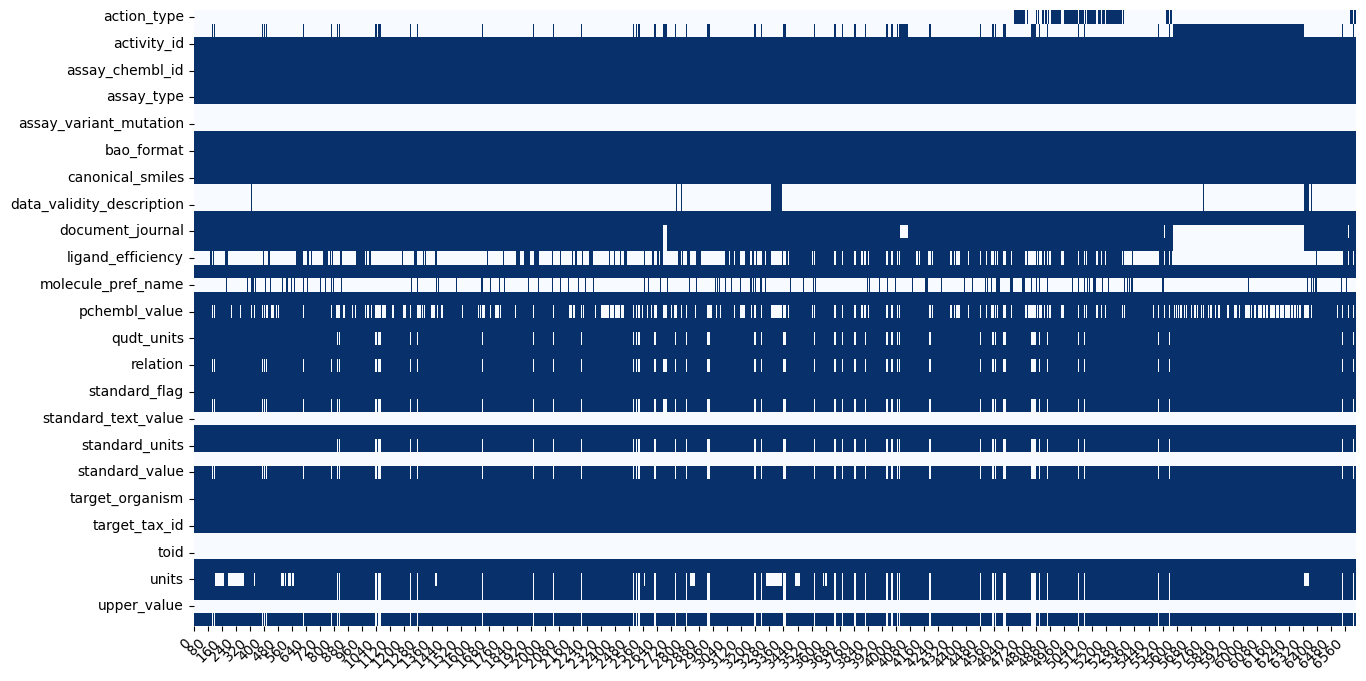

In [17]:
plot_missing_value(df)

In [18]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value',"target_organism"]
df_prep = df_nr[selection]

In [19]:
df_prep["target_organism"].unique()

array(['Homo sapiens', 'Mus musculus'], dtype=object)

In [20]:
df_prep = df_prep[df_prep["target_organism"] == "Homo sapiens"]

In [21]:
df_prep

,molecule_chembl_id,canonical_smiles,standard_value,target_organism
0,CHEMBL111217,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,63.0,Homo sapiens
2,CHEMBL130231,CCC(C)(C)c1cc(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)c(O...,51.0,Homo sapiens
4,CHEMBL337393,C/C(=C/C=C/C(C)=C/C(=O)O)c1cc(-c2cc(F)cc(F)c2)...,40.0,Homo sapiens
6,CHEMBL131826,CCCCOc1c(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)cc(C(C)C...,47.0,Homo sapiens
8,CHEMBL335242,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,30.0,Homo sapiens
...,...,...,...,...
6323,CHEMBL1531910,CCc1nnc(NC(=O)CSc2ncnc3c2oc2ccccc23)s1,18280.0,Homo sapiens
6324,CHEMBL1472426,Cc1nc(SCC(=O)Nc2ccc(F)cc2)c(C#N)c(C)c1CC(=O)c1...,9891.0,Homo sapiens
6325,CHEMBL1472393,C=CCNC(=O)c1ccc(-c2nc(-c3ccc(Cl)cc3Cl)cs2)cc1,10220.0,Homo sapiens
6326,CHEMBL1472502,COc1ccc(N2CCC(CNC(=O)Nc3ccccc3)C2)cc1,79370.0,Homo sapiens


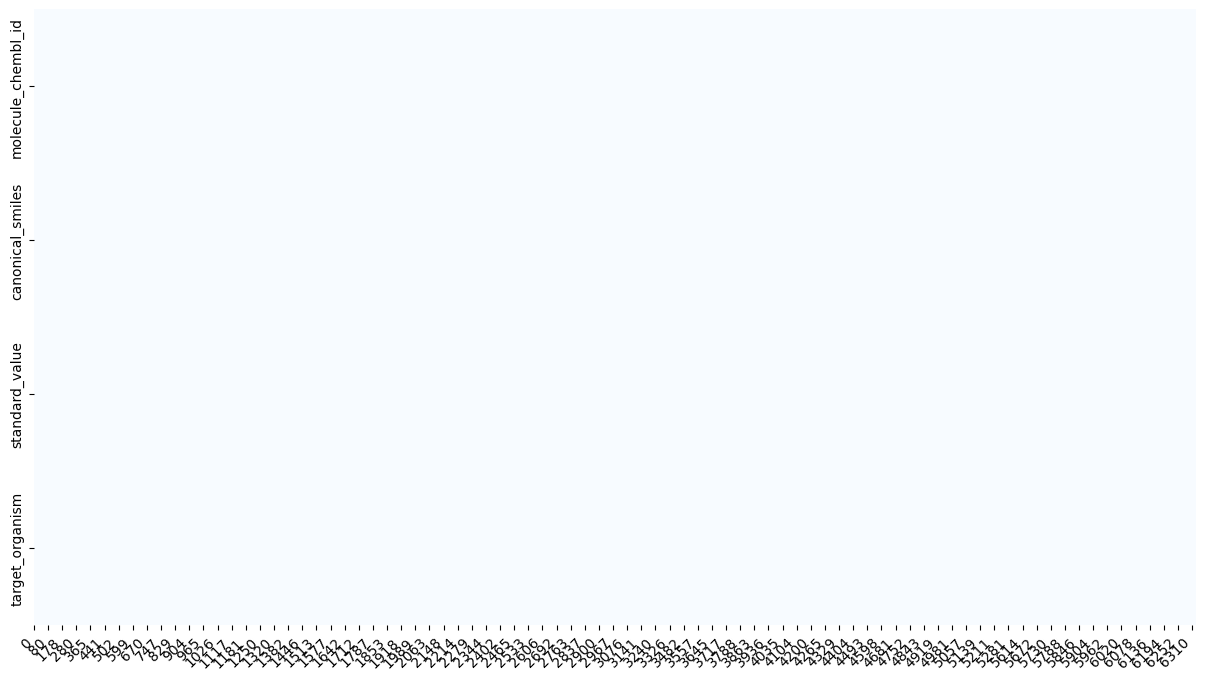

In [22]:
plot_missing_value(df_prep)

In [23]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df_prep = df_nr[selection]

In [24]:
df_prep

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL111217,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,63.0
2,CHEMBL130231,CCC(C)(C)c1cc(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)c(O...,51.0
4,CHEMBL337393,C/C(=C/C=C/C(C)=C/C(=O)O)c1cc(-c2cc(F)cc(F)c2)...,40.0
6,CHEMBL131826,CCCCOc1c(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)cc(C(C)C...,47.0
8,CHEMBL335242,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,30.0
...,...,...,...
6323,CHEMBL1531910,CCc1nnc(NC(=O)CSc2ncnc3c2oc2ccccc23)s1,18280.0
6324,CHEMBL1472426,Cc1nc(SCC(=O)Nc2ccc(F)cc2)c(C#N)c(C)c1CC(=O)c1...,9891.0
6325,CHEMBL1472393,C=CCNC(=O)c1ccc(-c2nc(-c3ccc(Cl)cc3Cl)cs2)cc1,10220.0
6326,CHEMBL1472502,COc1ccc(N2CCC(CNC(=O)Nc3ccccc3)C2)cc1,79370.0


In [25]:
df_prep.isna().sum()

molecule_chembl_id    0
canonical_smiles      0
standard_value        0
dtype: int64

In [26]:
df_prep.to_csv('00_dataset_prep_pparg.csv', index=False)

### Memberi label pada data

In [27]:
df_prep_label = pd.read_csv('00_dataset_prep_pparg.csv')

In [28]:
bioactivity_threshold = []
for i in df_prep_label.standard_value:
    if float(i) >= 10000:
        bioactivity_threshold.append("inactive")
    elif float(i) <= 1000:
        bioactivity_threshold.append("active")
    else:
        bioactivity_threshold.append("intermediate")



Mengapa batas penentuan kelas nya seperti itu?

- Inactive: EC50 ≥ 10000 nM (10 µM)
- Active: EC50 ≤ 1000 nM (1 µM)
- Intermediate: 1000 nM < EC50 < 10000 nM (1 µM - 10 µM)

Standar Farmakologi:

1. Kategori 1 µM sebagai cutoff active dan 10 µM sebagai cutoff inactive banyak digunakan dalam literatur farmakologi untuk menilai potensi senyawa sebagai agonis atau antagonis reseptor.
Relevansi Biologis:

2. Untuk target seperti PPARγ, senyawa dengan EC50 ≤ 1 µM memiliki potensi aktivasi kuat dan lebih mungkin memiliki dampak terapeutik pada diabetes atau gangguan metabolik.
Fokus pada Senyawa Poten:

3. Memprioritaskan senyawa dengan aktivitas tinggi (active) untuk langkah pengembangan lebih lanjut, sementara senyawa intermediate dapat dioptimalkan.

In [29]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')

In [30]:
bioactivity_class = pd.DataFrame(bioactivity_class)
bioactivity_class

,class
0,active
1,active
2,active
3,active
4,active
...,...
4839,inactive
4840,intermediate
4841,inactive
4842,inactive


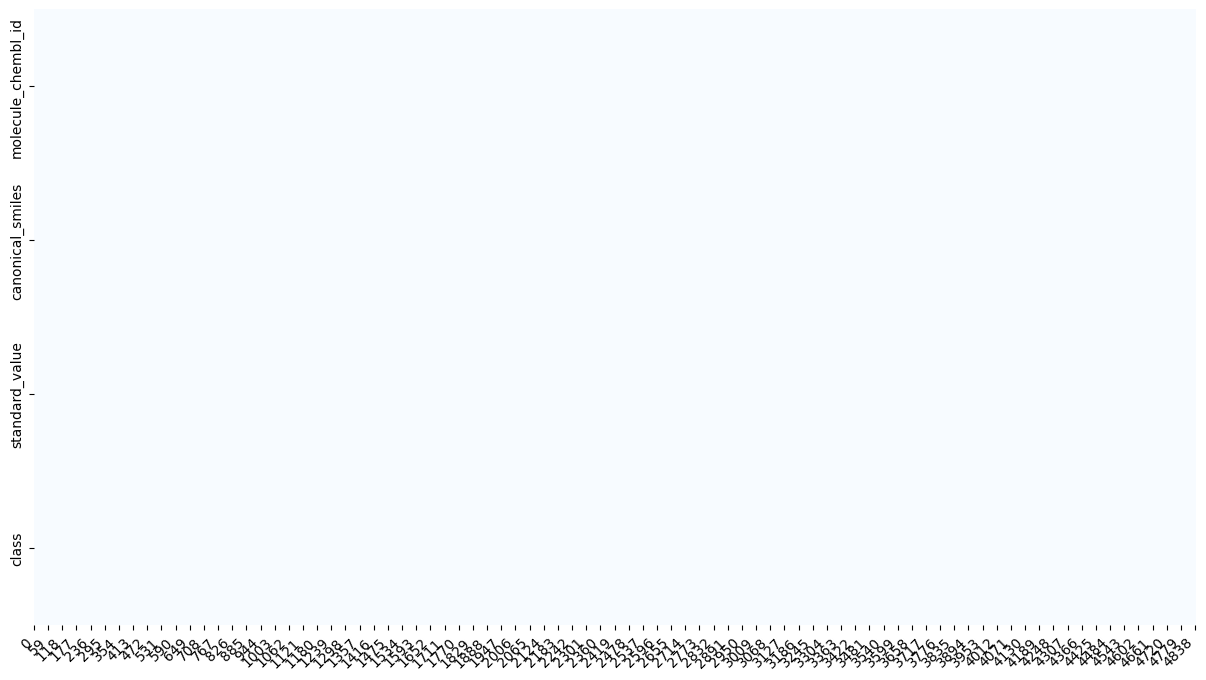

In [31]:
df_label = pd.concat([df_prep_label, bioactivity_class],axis=1)
plot_missing_value(df_label)

###Export dataset

In [32]:
df_label.to_csv('01_label_pparg.csv', index=False)

In [33]:
! zip '01_prep_pparg.csv'.zip *.csv

  adding: 00_dataset_prep_pparg.csv (deflated 82%)
  adding: 01_label_pparg.csv (deflated 83%)


### Transform SMILES menjadi LIST

In [34]:
df_eda = pd.read_csv('01_label_pparg.csv')
df_eda

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL111217,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,63.0,active
1,CHEMBL130231,CCC(C)(C)c1cc(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)c(O...,51.0,active
2,CHEMBL337393,C/C(=C/C=C/C(C)=C/C(=O)O)c1cc(-c2cc(F)cc(F)c2)...,40.0,active
3,CHEMBL131826,CCCCOc1c(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)cc(C(C)C...,47.0,active
4,CHEMBL335242,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,30.0,active
...,...,...,...,...
4839,CHEMBL1531910,CCc1nnc(NC(=O)CSc2ncnc3c2oc2ccccc23)s1,18280.0,inactive
4840,CHEMBL1472426,Cc1nc(SCC(=O)Nc2ccc(F)cc2)c(C#N)c(C)c1CC(=O)c1...,9891.0,intermediate
4841,CHEMBL1472393,C=CCNC(=O)c1ccc(-c2nc(-c3ccc(Cl)cc3Cl)cs2)cc1,10220.0,inactive
4842,CHEMBL1472502,COc1ccc(N2CCC(CNC(=O)Nc3ccccc3)C2)cc1,79370.0,inactive


In [35]:
df_eda = df_label
df_eda

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL111217,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,63.0,active
1,CHEMBL130231,CCC(C)(C)c1cc(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)c(O...,51.0,active
2,CHEMBL337393,C/C(=C/C=C/C(C)=C/C(=O)O)c1cc(-c2cc(F)cc(F)c2)...,40.0,active
3,CHEMBL131826,CCCCOc1c(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)cc(C(C)C...,47.0,active
4,CHEMBL335242,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,30.0,active
...,...,...,...,...
4839,CHEMBL1531910,CCc1nnc(NC(=O)CSc2ncnc3c2oc2ccccc23)s1,18280.0,inactive
4840,CHEMBL1472426,Cc1nc(SCC(=O)Nc2ccc(F)cc2)c(C#N)c(C)c1CC(=O)c1...,9891.0,intermediate
4841,CHEMBL1472393,C=CCNC(=O)c1ccc(-c2nc(-c3ccc(Cl)cc3Cl)cs2)cc1,10220.0,inactive
4842,CHEMBL1472502,COc1ccc(N2CCC(CNC(=O)Nc3ccccc3)C2)cc1,79370.0,inactive


In [36]:
df_no_smiles = df_eda.drop(columns='canonical_smiles')
df_no_smiles

,molecule_chembl_id,standard_value,class
0,CHEMBL111217,63.0,active
1,CHEMBL130231,51.0,active
2,CHEMBL337393,40.0,active
3,CHEMBL131826,47.0,active
4,CHEMBL335242,30.0,active
...,...,...,...
4839,CHEMBL1531910,18280.0,inactive
4840,CHEMBL1472426,9891.0,intermediate
4841,CHEMBL1472393,10220.0,inactive
4842,CHEMBL1472502,79370.0,inactive


In [37]:
smiles = []

for i in df_eda.canonical_smiles.tolist():
    cpd = str(i).split('.')
    cpd_longest = max(cpd, key = len)
    smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [38]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL111217,63.0,active,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...
1,CHEMBL130231,51.0,active,CCC(C)(C)c1cc(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)c(O...
2,CHEMBL337393,40.0,active,C/C(=C/C=C/C(C)=C/C(=O)O)c1cc(-c2cc(F)cc(F)c2)...
3,CHEMBL131826,47.0,active,CCCCOc1c(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)cc(C(C)C...
4,CHEMBL335242,30.0,active,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...
...,...,...,...,...
4839,CHEMBL1531910,18280.0,inactive,CCc1nnc(NC(=O)CSc2ncnc3c2oc2ccccc23)s1
4840,CHEMBL1472426,9891.0,intermediate,Cc1nc(SCC(=O)Nc2ccc(F)cc2)c(C#N)c(C)c1CC(=O)c1...
4841,CHEMBL1472393,10220.0,inactive,C=CCNC(=O)c1ccc(-c2nc(-c3ccc(Cl)cc3Cl)cs2)cc1
4842,CHEMBL1472502,79370.0,inactive,COc1ccc(N2CCC(CNC(=O)Nc3ccccc3)C2)cc1


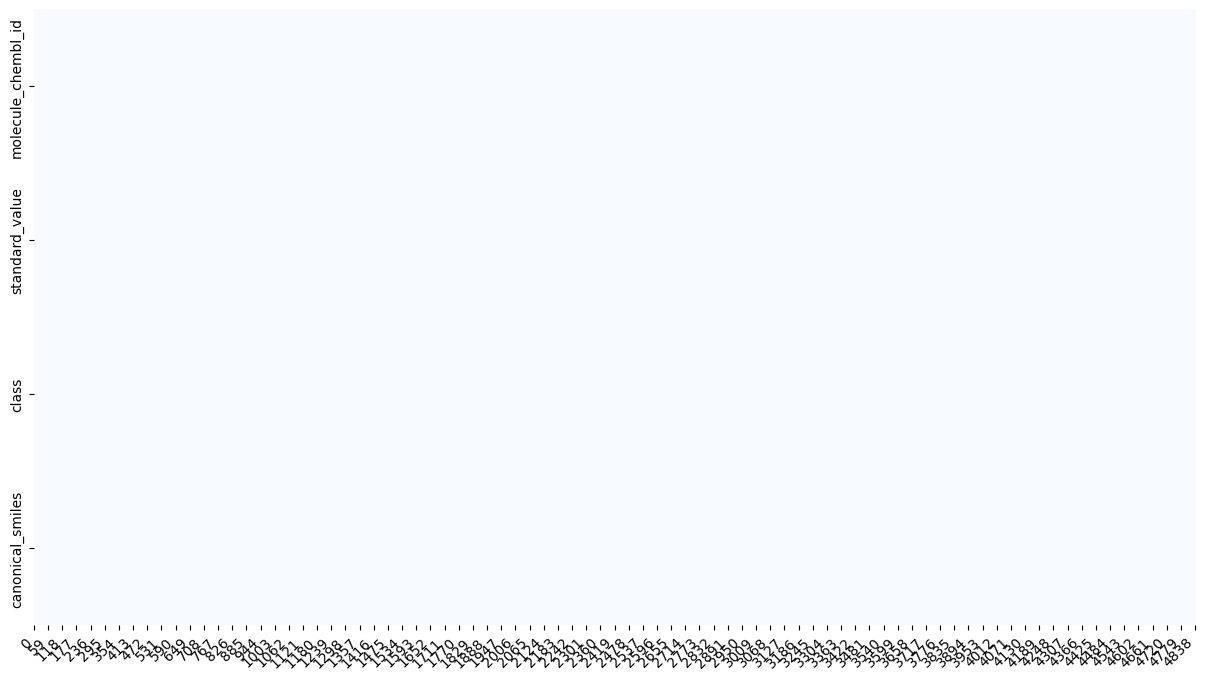

In [39]:
plot_missing_value(df_clean_smiles)

### Menghitung Lipinski Deskriptor

In [40]:
! pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 60.0 MB/s eta 0:00:00:00:0100:01


In [41]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit.Chem import Descriptors, Lipinski

In [42]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [43]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,438.530,7.21310,1.0,2.0
1,466.584,7.99330,1.0,2.0
2,462.483,7.38950,1.0,2.0
3,402.550,7.39990,1.0,2.0
4,456.520,7.51030,1.0,2.0
...,...,...,...,...
4839,371.447,3.52070,1.0,8.0
4840,512.404,5.62792,1.0,5.0
4841,389.307,5.69970,1.0,3.0
4842,325.412,3.34320,2.0,3.0


### Menggabungkan antara dataset dengan deskriptor lipinski

In [44]:
df_combined = pd.concat([df_clean_smiles,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,standard_value,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL111217,63.0,active,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,438.530,7.21310,1.0,2.0
1,CHEMBL130231,51.0,active,CCC(C)(C)c1cc(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)c(O...,466.584,7.99330,1.0,2.0
2,CHEMBL337393,40.0,active,C/C(=C/C=C/C(C)=C/C(=O)O)c1cc(-c2cc(F)cc(F)c2)...,462.483,7.38950,1.0,2.0
3,CHEMBL131826,47.0,active,CCCCOc1c(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)cc(C(C)C...,402.550,7.39990,1.0,2.0
4,CHEMBL335242,30.0,active,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,456.520,7.51030,1.0,2.0
...,...,...,...,...,...,...,...,...
4839,CHEMBL1531910,18280.0,inactive,CCc1nnc(NC(=O)CSc2ncnc3c2oc2ccccc23)s1,371.447,3.52070,1.0,8.0
4840,CHEMBL1472426,9891.0,intermediate,Cc1nc(SCC(=O)Nc2ccc(F)cc2)c(C#N)c(C)c1CC(=O)c1...,512.404,5.62792,1.0,5.0
4841,CHEMBL1472393,10220.0,inactive,C=CCNC(=O)c1ccc(-c2nc(-c3ccc(Cl)cc3Cl)cs2)cc1,389.307,5.69970,1.0,3.0
4842,CHEMBL1472502,79370.0,inactive,COc1ccc(N2CCC(CNC(=O)Nc3ccccc3)C2)cc1,325.412,3.34320,2.0,3.0


### Konversi EC50 menjadi pEC50

In [45]:
def pEC50(input):
    pEC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pEC50.append(-np.log10(molar))

    input['pEC50'] = pEC50
    x = input.drop('standard_value_norm', axis=1)

    return x

def norm1_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

In [46]:
df_norm = norm1_value(df_combined)
df_final = pEC50(df_norm)
df_final

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pEC50
0,CHEMBL111217,active,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,438.530,7.21310,1.0,2.0,7.200659
1,CHEMBL130231,active,CCC(C)(C)c1cc(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)c(O...,466.584,7.99330,1.0,2.0,7.292430
2,CHEMBL337393,active,C/C(=C/C=C/C(C)=C/C(=O)O)c1cc(-c2cc(F)cc(F)c2)...,462.483,7.38950,1.0,2.0,7.397940
3,CHEMBL131826,active,CCCCOc1c(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)cc(C(C)C...,402.550,7.39990,1.0,2.0,7.327902
4,CHEMBL335242,active,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,456.520,7.51030,1.0,2.0,7.522879
...,...,...,...,...,...,...,...,...
4839,CHEMBL1531910,inactive,CCc1nnc(NC(=O)CSc2ncnc3c2oc2ccccc23)s1,371.447,3.52070,1.0,8.0,4.738024
4840,CHEMBL1472426,intermediate,Cc1nc(SCC(=O)Nc2ccc(F)cc2)c(C#N)c(C)c1CC(=O)c1...,512.404,5.62792,1.0,5.0,5.004760
4841,CHEMBL1472393,inactive,C=CCNC(=O)c1ccc(-c2nc(-c3ccc(Cl)cc3Cl)cs2)cc1,389.307,5.69970,1.0,3.0,4.990549
4842,CHEMBL1472502,inactive,COc1ccc(N2CCC(CNC(=O)Nc3ccccc3)C2)cc1,325.412,3.34320,2.0,3.0,4.100344


### Menghapus kelas 'intermediet class'

In [47]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pEC50
0,CHEMBL111217,active,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,438.530,7.2131,1.0,2.0,7.200659
1,CHEMBL130231,active,CCC(C)(C)c1cc(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)c(O...,466.584,7.9933,1.0,2.0,7.292430
2,CHEMBL337393,active,C/C(=C/C=C/C(C)=C/C(=O)O)c1cc(-c2cc(F)cc(F)c2)...,462.483,7.3895,1.0,2.0,7.397940
3,CHEMBL131826,active,CCCCOc1c(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)cc(C(C)C...,402.550,7.3999,1.0,2.0,7.327902
4,CHEMBL335242,active,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,456.520,7.5103,1.0,2.0,7.522879
...,...,...,...,...,...,...,...,...
4838,CHEMBL1565229,inactive,COc1ccc(-c2cc(C(F)F)n3ncc(C(=O)N4CCCc5ccccc54)...,434.446,4.9355,0.0,5.0,4.100344
4839,CHEMBL1531910,inactive,CCc1nnc(NC(=O)CSc2ncnc3c2oc2ccccc23)s1,371.447,3.5207,1.0,8.0,4.738024
4841,CHEMBL1472393,inactive,C=CCNC(=O)c1ccc(-c2nc(-c3ccc(Cl)cc3Cl)cs2)cc1,389.307,5.6997,1.0,3.0,4.990549
4842,CHEMBL1472502,inactive,COc1ccc(N2CCC(CNC(=O)Nc3ccccc3)C2)cc1,325.412,3.3432,2.0,3.0,4.100344


In [48]:
df_2class.isna().sum()

molecule_chembl_id    0
class                 0
canonical_smiles      0
MW                    0
LogP                  0
NumHDonors            0
NumHAcceptors         0
pEC50                 0
dtype: int64

In [49]:
df_2class.to_csv('01_label2class_pparg.csv', index=False)

## PLOTTING

### Plot frekuensi dari dua kelas bioaktifitas

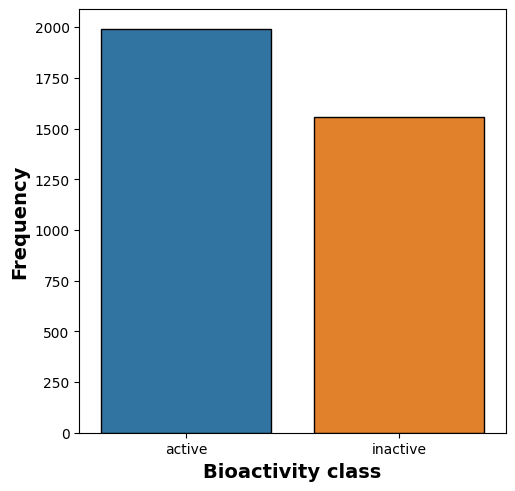

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### Scatter plot MW vs LogP

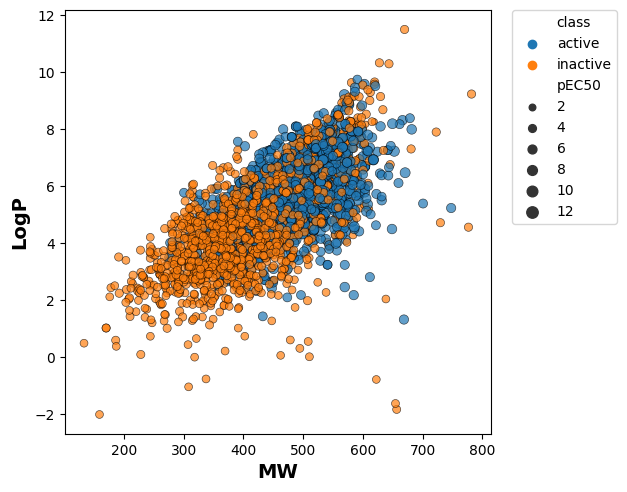

In [51]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pEC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### pEC50 Value Boxplots

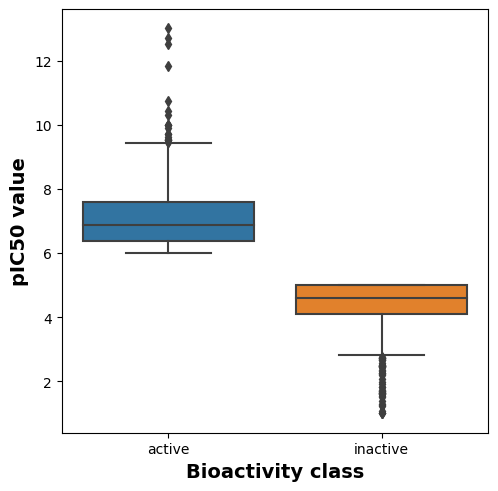

In [52]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pEC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ec50.pdf')

### Statistical analysis | Mann-Whitney U Test

In [53]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [54]:
mannwhitney('pEC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pEC50,3096873.0,0.0,0.05,Different distribution (reject H0)


### MW

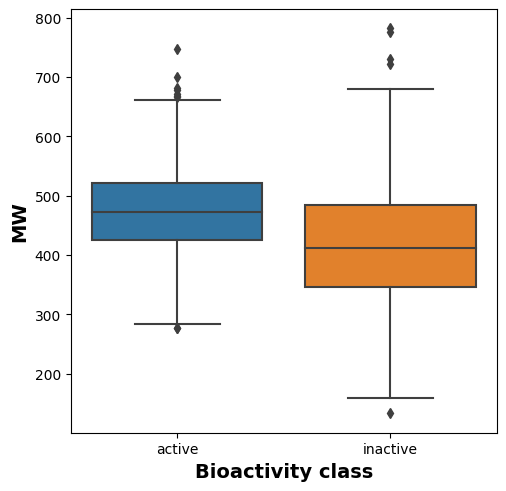

In [55]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [56]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,2144698.0,1.853872e-86,0.05,Different distribution (reject H0)


### LogP

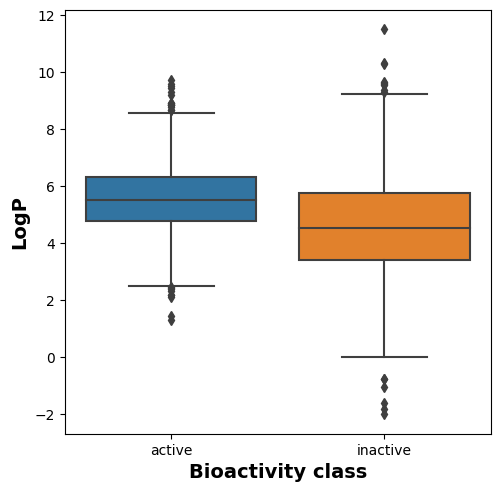

In [57]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [58]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2114660.5,3.747047e-78,0.05,Different distribution (reject H0)


### NumHDonors

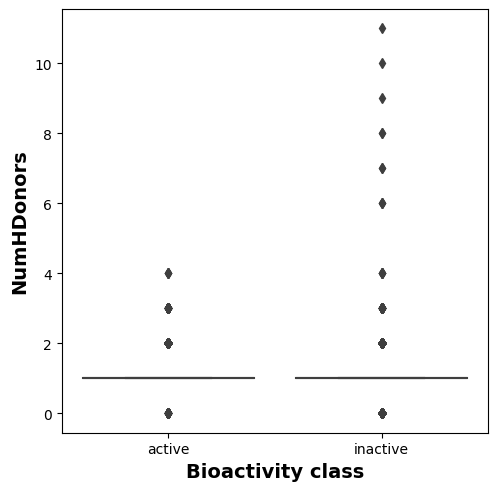

In [59]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

### NumHAcceptors

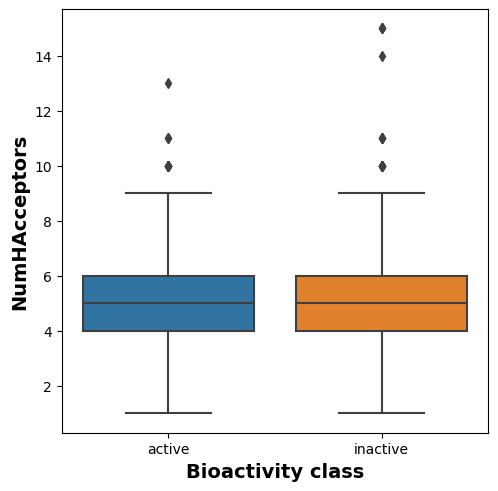

In [60]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [61]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1624045.0,0.010804,0.05,Different distribution (reject H0)


## Fingerprint Generation

### Padel Descriptor

In [62]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df_2class[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [63]:
! cat molecule.smi | head -5

CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1OCC(F)F)=C\C(=O)O	CHEMBL111217
CCC(C)(C)c1cc(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)c(OCC(F)F)c(C(C)(C)CC)c1	CHEMBL130231
C/C(=C/C=C/C(C)=C/C(=O)O)c1cc(-c2cc(F)cc(F)c2)cc(C(C)C)c1OCC(F)F	CHEMBL337393
CCCCOc1c(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)cc(C(C)C)cc1C(C)C	CHEMBL131826
CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1OCC(F)(F)F)=C\C(=O)O	CHEMBL335242
cat: write error: Broken pipe


In [64]:
! cat molecule.smi | wc -l

3546


In [65]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [66]:
! bash padel.sh

Processing CHEMBL111217 in molecule.smi (1/3546). 
Processing CHEMBL130231 in molecule.smi (2/3546). 
Processing CHEMBL131826 in molecule.smi (4/3546). 
Processing CHEMBL337393 in molecule.smi (3/3546). 
Processing CHEMBL131122 in molecule.smi (6/3546). Average speed: 5.61 s/mol.
Processing CHEMBL335242 in molecule.smi (5/3546). Average speed: 5.50 s/mol.
Processing CHEMBL130317 in molecule.smi (7/3546). Average speed: 2.81 s/mol.
Processing CHEMBL130232 in molecule.smi (8/3546). Average speed: 1.90 s/mol.
Processing CHEMBL133915 in molecule.smi (9/3546). Average speed: 1.59 s/mol.
Processing CHEMBL422088 in molecule.smi (10/3546). Average speed: 1.07 s/mol.
Processing CHEMBL133896 in molecule.smi (11/3546). Average speed: 1.07 s/mol.
Processing CHEMBL75133 in molecule.smi (12/3546). Average speed: 0.96 s/mol.
Processing CHEMBL424269 in molecule.smi (13/3546). Average speed: 0.87 s/mol.
Processing CHEMBL132568 in molecule.smi (14/3546). Average speed: 0.79 s/mol.
Processing CHEMBL28843

### Menggabungkan Fingerprint dan dataframe class

In [67]:
df_X = pd.read_csv('descriptors_output.csv')

In [68]:
df_X = df_X.drop(columns=['Name'])
df_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3542,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3543,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3544,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df_2class_prep = pd.read_csv('01_label2class_pparg.csv')

In [70]:
selection1= ['pEC50', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
df_Y = df_2class_prep[selection1]
df_Y

,pEC50,MW,LogP,NumHDonors,NumHAcceptors
0,7.200659,438.530,7.2131,1.0,2.0
1,7.292430,466.584,7.9933,1.0,2.0
2,7.397940,462.483,7.3895,1.0,2.0
3,7.327902,402.550,7.3999,1.0,2.0
4,7.522879,456.520,7.5103,1.0,2.0
...,...,...,...,...,...
3541,4.100344,434.446,4.9355,0.0,5.0
3542,4.738024,371.447,3.5207,1.0,8.0
3543,4.990549,389.307,5.6997,1.0,3.0
3544,4.100344,325.412,3.3432,2.0,3.0


In [71]:
dataset = pd.concat([df_X,df_Y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pEC50,MW,LogP,NumHDonors,NumHAcceptors
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,7.200659,438.530,7.2131,1.0,2.0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,7.292430,466.584,7.9933,1.0,2.0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,7.397940,462.483,7.3895,1.0,2.0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,7.327902,402.550,7.3999,1.0,2.0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,7.522879,456.520,7.5103,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,4.100344,434.446,4.9355,0.0,5.0
3542,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,4.738024,371.447,3.5207,1.0,8.0
3543,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,4.990549,389.307,5.6997,1.0,3.0
3544,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,4.100344,325.412,3.3432,2.0,3.0


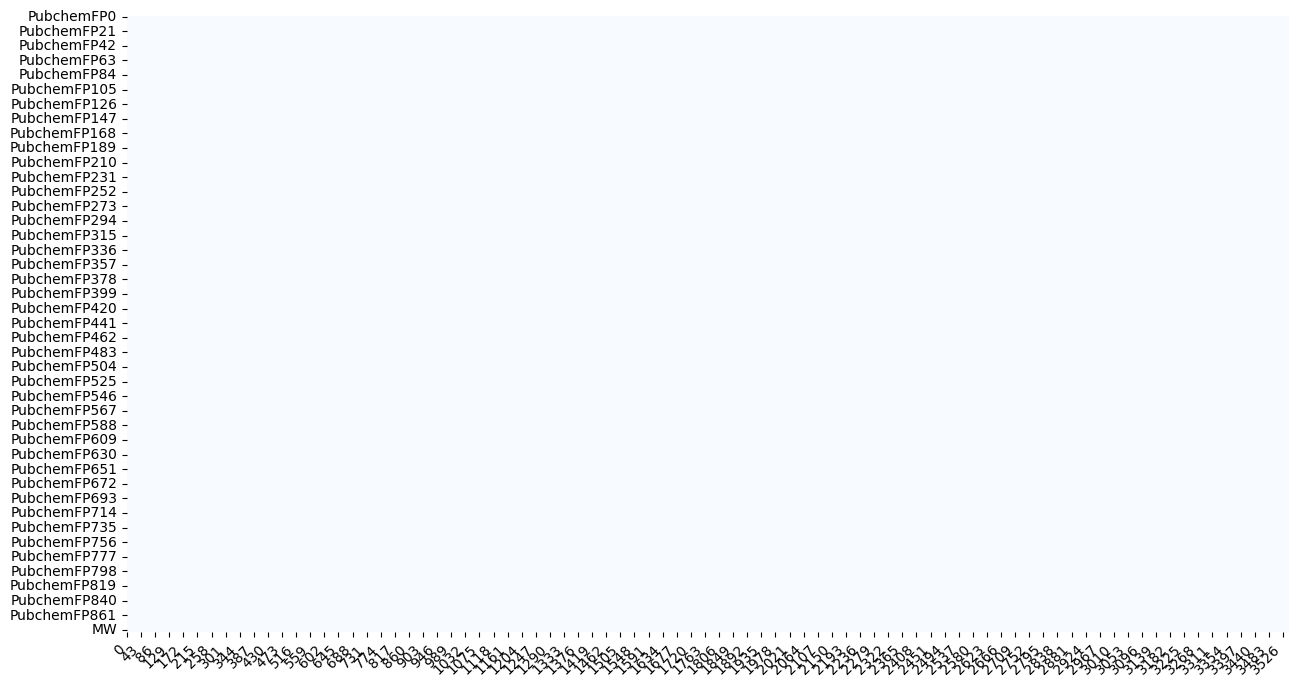

In [72]:
plot_missing_value(dataset)

In [73]:
dataset.isna().sum()

PubchemFP0       0
PubchemFP1       0
PubchemFP2       0
PubchemFP3       0
PubchemFP4       0
                ..
pEC50            0
MW               0
LogP             0
NumHDonors       0
NumHAcceptors    0
Length: 886, dtype: int64

### Mengecek low variance

In [74]:
selection2= ['pEC50', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
lipinski = dataset [selection2]
lipinski.head()

,pEC50,MW,LogP,NumHDonors,NumHAcceptors
0,7.200659,438.530,7.2131,1.0,2.0
1,7.292430,466.584,7.9933,1.0,2.0
2,7.397940,462.483,7.3895,1.0,2.0
3,7.327902,402.550,7.3999,1.0,2.0
4,7.522879,456.520,7.5103,1.0,2.0


In [75]:
variance = dataset.drop(columns= ['pEC50',  'MW', 'LogP', 'NumHDonors', 'NumHAcceptors'], axis=1)
variance.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [76]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
variance = selection.fit_transform(variance)
variance = pd.DataFrame(variance)
variance.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
164    0
165    0
166    0
167    0
168    0
Length: 169, dtype: int64

In [77]:
variance.columns = variance.columns.astype(str)

In [78]:
fix = pd.concat([variance,lipinski], axis=1)
fix

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,pEC50,MW,LogP,NumHDonors,NumHAcceptors
0,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,1,7.200659,438.530,7.2131,1.0,2.0
1,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,1,7.292430,466.584,7.9933,1.0,2.0
2,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,1,7.397940,462.483,7.3895,1.0,2.0
3,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,1,7.327902,402.550,7.3999,1.0,2.0
4,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,1,7.522879,456.520,7.5103,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,1,0,1,0,0,1,1,1,0,1,...,1,0,0,0,0,4.100344,434.446,4.9355,0.0,5.0
3542,1,0,0,1,0,1,1,1,1,1,...,0,0,0,0,1,4.738024,371.447,3.5207,1.0,8.0
3543,1,0,0,1,0,1,1,1,1,1,...,0,0,0,0,0,4.990549,389.307,5.6997,1.0,3.0
3544,1,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,4.100344,325.412,3.3432,2.0,3.0


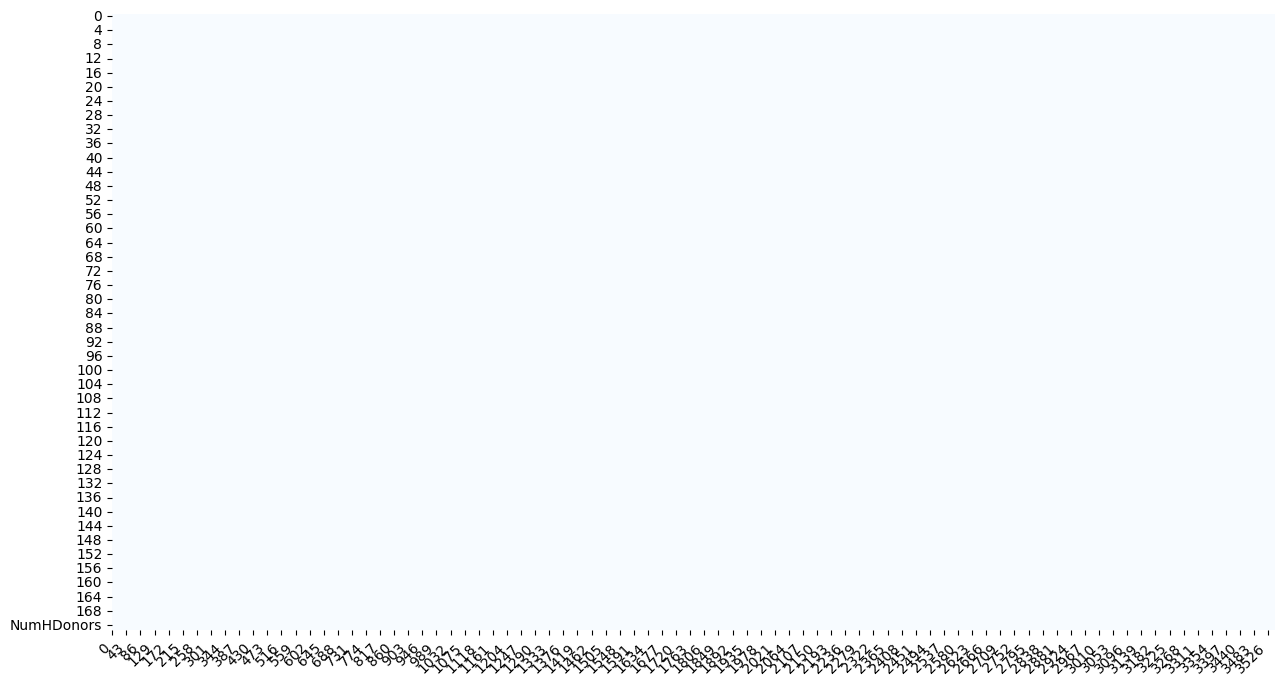

In [79]:
plot_missing_value(fix)

In [80]:
fix.to_csv('02_dataset_model_pparg.csv', index=False)

## MODEL DENGAN MENGGUNAKAN PIPELINE DARI SKLEARN

In [81]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [82]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [83]:
X = fix.drop(columns="pEC50")
Y = fix.pEC50

kategori = X.select_dtypes(include=['object']).columns
numerik = X.select_dtypes(exclude=['object']).columns

In [84]:
numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        (
            "imputation_constant",
            SimpleImputer(fill_value="missing", strategy="constant"),
        ),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, kategori),
        ("numerical", numeric_preprocessor, numerik),
    ]
)
pipe = make_pipeline(preprocessor, RandomForestRegressor(n_jobs=-1, random_state=42))
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '163', '164', '165', '166', '167', '168', 'MW', 'LogP', 'NumHDonors',
       'NumHAcceptors'],
      dtype='object', length=173))])),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=42))])

In [85]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [86]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,163,164,165,166,167,168,MW,LogP,NumHDonors,NumHAcceptors
299,0,1,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,499.994,6.30030,2.0,4.0
2550,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,310.437,5.72782,1.0,2.0
3079,1,0,0,1,0,1,1,1,1,0,...,0,0,0,0,0,0,412.470,5.04540,1.0,4.0
2342,1,1,0,0,1,1,1,1,0,1,...,0,0,0,1,0,0,409.829,4.69120,1.0,6.0
1211,1,1,0,0,0,1,1,1,0,0,...,1,1,1,0,0,1,463.578,4.86502,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,0,1,0,1,0,1,1,1,1,0,...,0,1,0,0,0,0,387.457,4.32272,1.0,6.0
2646,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,400.449,6.20710,1.0,2.0
1427,1,1,1,0,0,1,1,1,0,1,...,1,1,0,1,0,1,559.497,5.83522,1.0,9.0
1957,1,1,1,1,0,1,1,1,1,0,...,0,1,1,1,1,1,408.519,5.76750,1.0,4.0


In [87]:
y_test

299     6.980012
2550    4.602060
3079    4.035128
2342    6.133122
1211    7.522879
          ...   
1624    8.568636
2646    6.031517
1427    6.008774
1957    2.810000
1284    6.522879
Name: pEC50, Length: 1064, dtype: float64

In [88]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object')),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '163', '164', '165', '166', '167', '168', 'MW', 'LogP', 'NumHDonors',
       'NumHAcceptors'],
      dtype='object', length=173))])),
                ('randomforestregressor',
                 RandomForestRegressor(n_jobs=-1, random_state=42))])

In [89]:
# Make predictions on the test set
predictions = pipe.predict(X_test)
predictions

array([6.51041817, 4.9926621 , 6.29031703, ..., 5.32410866, 5.46377116,
       6.10504265])

In [90]:
import lazypredict
from lazypredict.Supervised import LazyRegressor, LazyClassifier

reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
train,test = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:39<00:00,  1.07it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1039
[LightGBM] [Info] Number of data points in the train set: 2482, number of used features: 173
[LightGBM] [Info] Start training from score 5.913966


In [91]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.55,0.62,0.92,0.73
RandomForestRegressor,0.54,0.61,0.93,3.76
ExtraTreesRegressor,0.54,0.61,0.93,4.41
XGBRegressor,0.52,0.59,0.95,0.33
LGBMRegressor,0.51,0.59,0.96,0.23
BaggingRegressor,0.50,0.58,0.97,0.40
NuSVR,0.48,0.56,0.99,0.94
SVR,0.47,0.56,0.99,1.16
KNeighborsRegressor,0.45,0.54,1.02,0.08


In [92]:
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.55,0.62,0.92,0.73
RandomForestRegressor,0.54,0.61,0.93,3.76
ExtraTreesRegressor,0.54,0.61,0.93,4.41
XGBRegressor,0.52,0.59,0.95,0.33
LGBMRegressor,0.51,0.59,0.96,0.23
BaggingRegressor,0.50,0.58,0.97,0.40
NuSVR,0.48,0.56,0.99,0.94
SVR,0.47,0.56,0.99,1.16
KNeighborsRegressor,0.45,0.54,1.02,0.08


[(0.0, 1.0)]

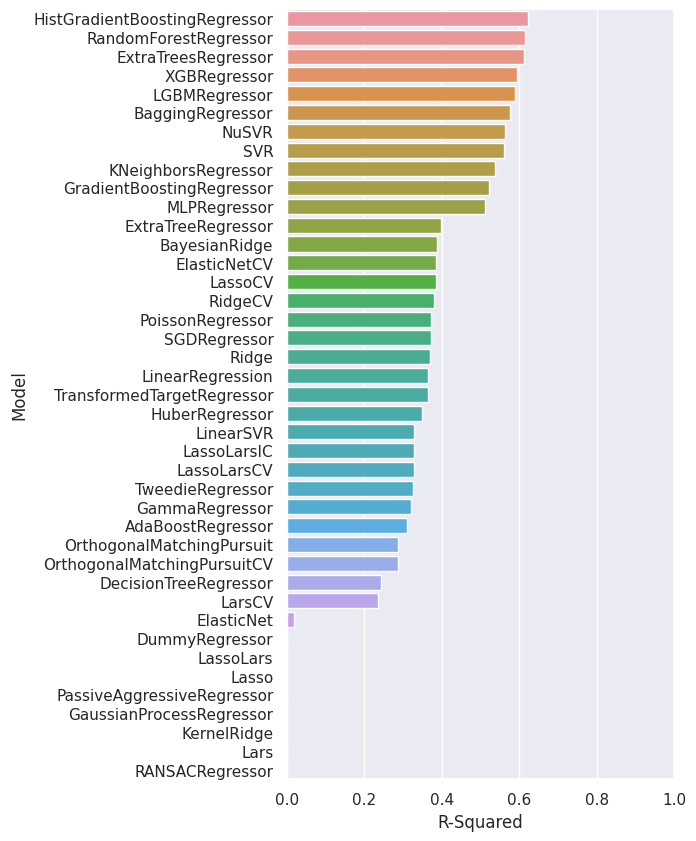

In [93]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style='darkgrid')
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

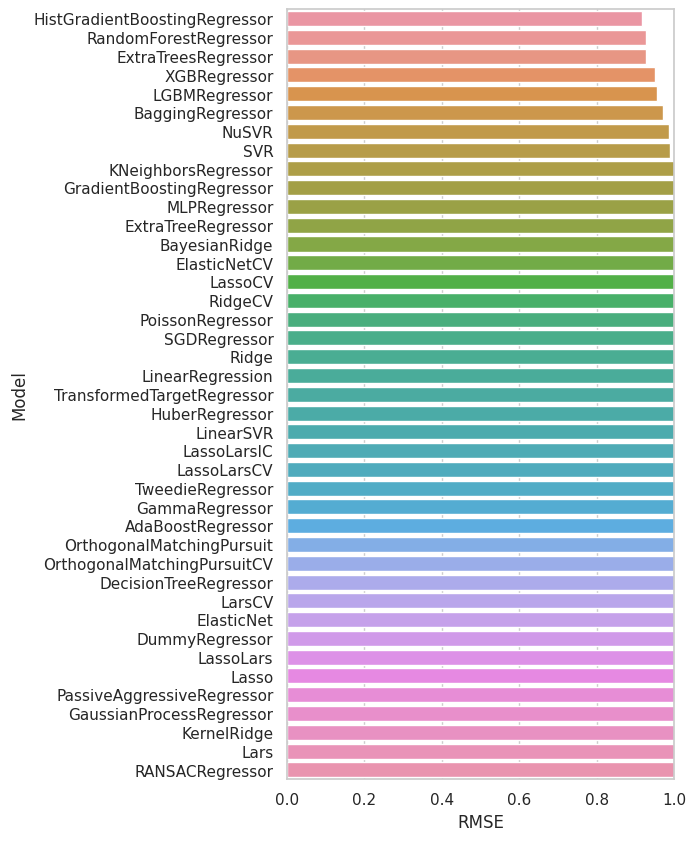

In [94]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 1))

[(0.0, 2.0)]

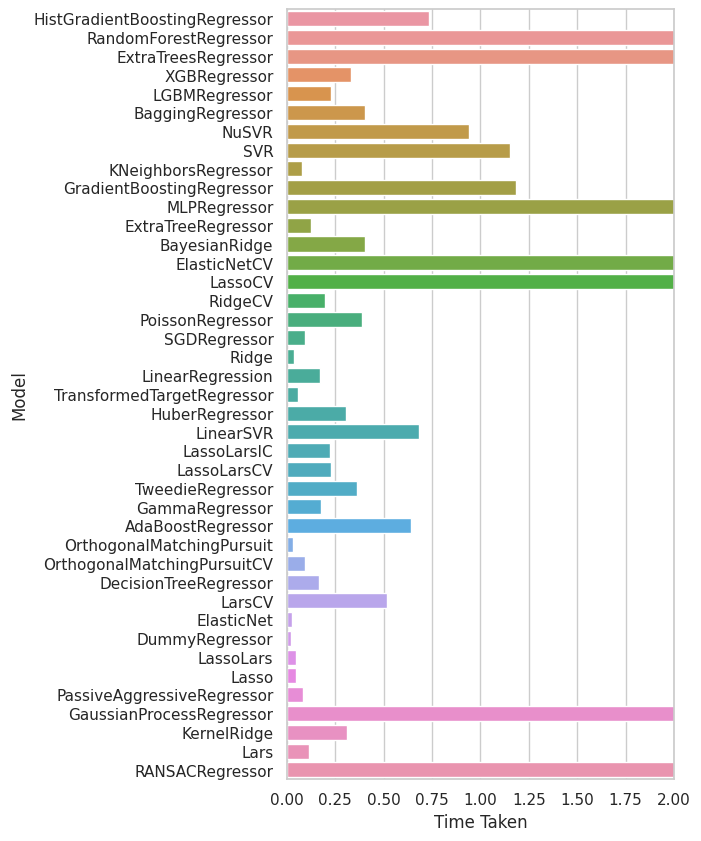

In [95]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 2))

## Tanimoto & Klustering
1. Mencari senyawa yang mirip dengan kueri atau senyawa tertentu
Query dibawah ini adalah senyawa Pioglitazon. Kita akan mencoba mencari senyawa yang mirip Pioglitazon dari dataset. Yang digunakan dalam 


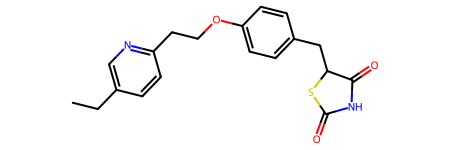

In [125]:
# Menghitung fingerprint untuk senyawa query
query = AllChem.MolFromSmiles('CCC1=CN=C(C=C1)CCOC2=CC=C(C=C2)CC3C(=O)NC(=O)S3')
query_fps = AllChem.GetMorganFingerprintAsBitVect(query, 2, nBits=4096)
query

In [126]:
# Menghitung fingerprint seluruh dataset(total 4732)
all_Mfpts = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=4096) for mol in dataset.Structure]
len(all_Mfpts)

3546

In [127]:
# Menghitung Tanimoto coefficient dari senyawa query dan membandingkannya dengan tiap senyawa pad dataset
# Simpan semuanya di dalam list
Tanimoto_similarity = [DataStructs.FingerprintSimilarity(query_fps, x, metric=DataStructs.TanimotoSimilarity) for x in all_Mfpts]

In [128]:
# Menyimpan dataset kedalam variabel baru - agar tidak mengganggu dataset awal
dataset_sim = dataset

In [129]:
# Menambahkan kolom tanimoto_values pada dataset
dataset_sim["tanimoto_values"] = Tanimoto_similarity

In [130]:
# Mengurutkan dataset
dataset_sorted = dataset.sort_values(['tanimoto_values'],ascending=False)
dataset_sorted

,canonical_smiles,pEC50,Structure,tanimoto_values
73,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1,6.23,<rdkit.Chem.rdchem.Mol object at 0x7df02352a730>,1.00
387,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)cc1,6.24,<rdkit.Chem.rdchem.Mol object at 0x7df0225cf680>,0.75
2463,CCc1ccc(C(=O)COc2ccc(CC3SC(=O)NC3=O)cc2)nc1,6.18,<rdkit.Chem.rdchem.Mol object at 0x7df0225fcb30>,0.67
2461,CCc1ccc([C@H](O)COc2ccc(CC3SC(=O)NC3=O)cc2)nc1,6.57,<rdkit.Chem.rdchem.Mol object at 0x7df0225fca50>,0.65
90,Cc1oc(-c2ccccc2)nc1CCOc1ccc(CC2SC(=O)NC2=O)cc1,8.50,<rdkit.Chem.rdchem.Mol object at 0x7df023529fc0>,0.54
...,...,...,...,...
2951,Cc1ccc(Cl)cc1-c1ccc(/C=N/c2ccc(N3CCOCC3)cc2)o1,4.71,<rdkit.Chem.rdchem.Mol object at 0x7df02212e260>,0.04
3527,NC(=NO)c1c(N)no[n+]1[O-],4.10,<rdkit.Chem.rdchem.Mol object at 0x7df02213e0a0>,0.04
3199,CSC1=NP(=S)(SC)N(C)c2nc3n(c21)CCC3,4.10,<rdkit.Chem.rdchem.Mol object at 0x7df022135000>,0.04
3066,Clc1cccc(-c2ccc(/C=N/c3ccc(N4CCOCC4)cc3)o2)c1Cl,4.52,<rdkit.Chem.rdchem.Mol object at 0x7df022131540>,0.03


# MODEL

In [96]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.model_selection import ShuffleSplit, cross_validate,train_test_split
from rdkit.Chem import PandasTools

In [97]:
dataset = pd.read_csv('01_label2class_pparg.csv')

selection = ['canonical_smiles','pEC50']
dataset = dataset[selection]
dataset.to_csv('input_deskriptor.csv', index=False)

In [98]:
dataset = pd.read_csv('input_deskriptor.csv')
dataset.head()

,canonical_smiles,pEC50
0,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,7.20
1,CCC(C)(C)c1cc(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)c(O...,7.29
2,C/C(=C/C=C/C(C)=C/C(=O)O)c1cc(-c2cc(F)cc(F)c2)...,7.40
3,CCCCOc1c(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)cc(C(C)C...,7.33
4,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,7.52


,canonical_smiles,pEC50,Structure
0,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,7.20,
1,CCC(C)(C)c1cc(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)c(O...,7.29,
2,C/C(=C/C=C/C(C)=C/C(=O)O)c1cc(-c2cc(F)cc(F)c2)...,7.40,
3,CCCCOc1c(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)cc(C(C)C...,7.33,
4,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,7.52,
...,...,...,...
3541,COc1ccc(-c2cc(C(F)F)n3ncc(C(=O)N4CCCc5ccccc54)...,4.10,
3542,CCc1nnc(NC(=O)CSc2ncnc3c2oc2ccccc23)s1,4.74,
3543,C=CCNC(=O)c1ccc(-c2nc(-c3ccc(Cl)cc3Cl)cs2)cc1,4.99,
3544,COc1ccc(N2CCC(CNC(=O)Nc3ccccc3)C2)cc1,4.10,

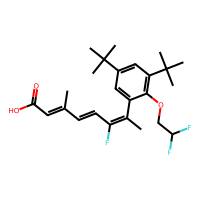
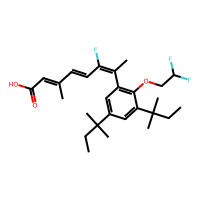
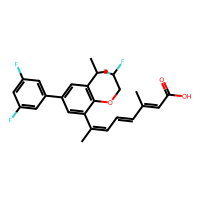
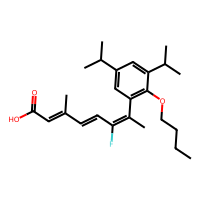
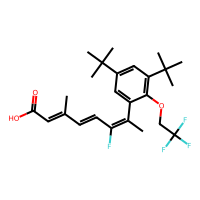
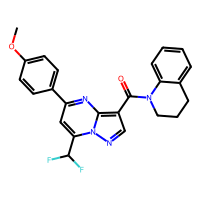
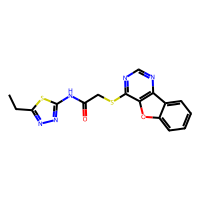
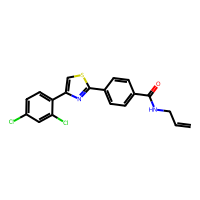
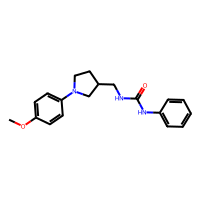
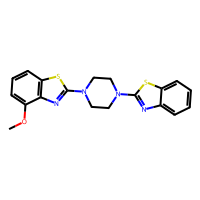

In [99]:
PandasTools.AddMoleculeColumnToFrame(dataset,'canonical_smiles', 'Structure')
dataset

In [100]:
dataset.head()

,canonical_smiles,pEC50,Structure
0,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,7.20,<rdkit.Chem.rdchem.Mol object at 0x7df0225f06d0>
1,CCC(C)(C)c1cc(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)c(O...,7.29,<rdkit.Chem.rdchem.Mol object at 0x7df0225f0660>
2,C/C(=C/C=C/C(C)=C/C(=O)O)c1cc(-c2cc(F)cc(F)c2)...,7.40,<rdkit.Chem.rdchem.Mol object at 0x7df0225f0820>
3,CCCCOc1c(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)cc(C(C)C...,7.33,<rdkit.Chem.rdchem.Mol object at 0x7df0225f0430>
4,CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...,7.52,<rdkit.Chem.rdchem.Mol object at 0x7df0225f05f0>


In [101]:
def generate_AVfpts(data):

    # Store fingerprints using empty lists

    Avalon_fpts = []

    # Here no need to generate mol files
    # We can directly use the structure column of the data frame
    # mols = [Chem.MolFromSmiles(x) for x in data if x is not None]
    for mol in tqdm(data):


        #=============================
        # calculate Avalon fingerprints
        #=============================
        avfpts = pyAvalonTools.GetAvalonFP(mol, nBits=4096)
        Avalon_fpts.append(avfpts)


    #=====append=========================
    # return the lists as numpy array
    #====================================
    return np.array(Avalon_fpts)

In [102]:
from tqdm import tqdm
#------------------- Fingerprint
from rdkit.Chem import MACCSkeys
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem import rdMolDescriptors

# Function call
Avalon_fpts = generate_AVfpts(dataset['Structure'])

100%|██████████| 3546/3546 [00:03<00:00, 910.66it/s] 


In [103]:
# Put Avalon fingerprints into Dataframe
Avalon_fingerprints = pd.DataFrame(Avalon_fpts, columns=['Col_A_{}'.format(i + 1)
                                                        for i in range(Avalon_fpts.shape[1])])

Avalon_fingerprints.head()

,Col_A_1,Col_A_2,Col_A_3,Col_A_4,Col_A_5,Col_A_6,Col_A_7,Col_A_8,Col_A_9,Col_A_10,...,Col_A_4087,Col_A_4088,Col_A_4089,Col_A_4090,Col_A_4091,Col_A_4092,Col_A_4093,Col_A_4094,Col_A_4095,Col_A_4096
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [104]:
# Instantiate the models
model_extratree = ExtraTreesRegressor(n_estimators=100, n_jobs=-1)

In [105]:
# start time
start = time.time()

# tenfold cross-validation
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
scoring = ['r2','neg_mean_absolute_error']

scores_val = cross_validate(model_extratree, Avalon_fingerprints,  dataset.pEC50, scoring=scoring, cv=cv)

print(scores_val)

time.sleep(3)
# get the end time
end = time.time()

# get the execution time
total_time = end - start
print('Total time required:', round(total_time/60, 2), 'min')

{'fit_time': array([24.75821829, 23.66333485, 23.47736311, 23.26448059, 21.57891059,
       23.58735228, 25.31143236, 23.02591968, 23.41632175, 25.25098205]), 'score_time': array([0.07516885, 0.06738758, 0.06777692, 0.06658483, 0.06718135,
       0.06758857, 0.07022095, 0.06736422, 0.06874847, 0.06813049]), 'test_r2': array([0.58918391, 0.5029273 , 0.55458359, 0.60608618, 0.5966844 ,
       0.59736662, 0.57260867, 0.57059198, 0.53301837, 0.62480757]), 'test_neg_mean_absolute_error': array([-0.61159214, -0.62122571, -0.62208559, -0.57702488, -0.61971123,
       -0.59709941, -0.62752859, -0.62135284, -0.64317696, -0.57529673])}
Total time required: 4.02 min


In [106]:
print("R^2 :", round(np.mean(scores_val['test_r2']), 2))
print("MAE :", round(np.mean(-scores_val['test_neg_mean_absolute_error']), 2))

R^2 : 0.57
MAE : 0.61


## KESIMPULAN

Model sudah cukup baik dikarenakan tidak mengalami overfitting. Lalu juga pada dataset yang sudah dibentuk terdapat beberapa senyawa yang mirip dengan salah satu obat anti diabetes yakni Pioglitazone dengan ukuran kemiripan 100%. Dan juga bisa kita lihat senyawa dengan pEC50>=6 memiliki kemampuan untuk menjadi agonis dari reseptor PPARG dalam pengobatan diabetes tipe 2 dan obesitas